## Transfer Learning Inception V3 using Keras

In [14]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\tarun\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [16]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [17]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [18]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [19]:
for layer in inception.layers:
    layer.trainable = False

In [20]:
folders = glob('Datasets/train/*')

In [21]:
x = Flatten()(inception.output)

In [22]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [23]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [24]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [27]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [28]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\tarun\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
574/574 [==============================] - 294s 500ms/step - loss: 4.6291 - accuracy: 0.5743 - val_loss: 2.3488 - val_accuracy: 0.7381
Epoch 2/10
574/574 [==============================] - 217s 378ms/step - loss: 2.1392 - accuracy: 0.7764 - val_loss: 1.6540 - val_accuracy: 0.8264
Epoch 3/10
574/574 [==============================] - 215s 374ms/step - loss: 1.8995 - accuracy: 0.8265 - val_loss: 2.8061 - val_accuracy: 0.7738
Epoch 4/10
574/574 [==============================] - 212s 368ms/step - loss: 1.9013 - accuracy: 0.8389 - val_loss: 2.9372 - val_accuracy: 0.7991
Epoch 5/10
574/574 [==============================] - 202s 352ms/step - loss: 1.7747 - accuracy: 0.8585 - val_loss: 2.4666 - val_accuracy: 0.8166
Epoch 6/10
574/574 [==============================] - 203s 353ms/step - loss: 1.8569 - accuracy: 0.8610 - val_loss: 2.0279 - val_accuracy: 0.8523
Epoch 7/10
574/574 [==============================] - 204s 355ms/step - loss: 1.7235 - accuracy: 0.8750 - val_loss: 2.2505 -

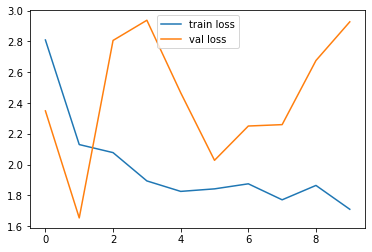

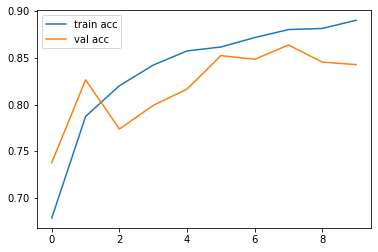

<Figure size 432x288 with 0 Axes>

In [30]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [31]:
model.save('model_inception.h5')

In [32]:
y_pred = model.predict(test_set)

In [33]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1008993e-30, 3.9164331e-16, 1.6751481e-28, ..., 0.0000000e+00,
        3.0117969e-06, 0.0000000e+00],
       [1.5532637e-13, 1.3515346e-08, 1.4998501e-22, ..., 3.5286974e-38,
        1.2913665e-19, 0.0000000e+00],
       ...,
       [1.7144918e-26, 9.8759460e-01, 3.8731432e-17, ..., 0.0000000e+00,
        7.2735465e-15, 0.0000000e+00],
       [3.2422106e-28, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.8384706e-27],
       [1.4642901e-30, 4.9163516e-24, 4.6971900e-34, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [34]:
y_pred = np.argmax(y_pred, axis=1)

In [35]:
y_pred

array([2, 3, 4, ..., 1, 6, 8], dtype=int64)